# ITCS523 Group Coaching - Comparative Analysis of Air Quality Variability Between Major and Peripheral Cities: A Case Study of Thailand

This project aims to explore the variability in Air Quality Index (AQI) between major and peripheral cities in Thailand between February - April 2025, and develop a time series model to capture this variability.

**Research questions**
1. Are there differences in AQI between major and peripheral cities in Thailand between February - April 2025?
2. What are the relationships among different AQI?
3. What statistical model is the most appropriate for modeling AQI for major and peripheral cities?

**Hypotheses**
1. AQI in major cities is worse than AQI in peripheral cities
    - Possible reason: Major cities tend to have more modern economic activity such as manufacturing, leading to higher air pollution. Moreover, major cities usually have tall buildings, trapping air pollution
2. Different AQI have moderate linear relationships with each other
3. Moving average (MA) models are more suitable in modeling AQI
    - Possible reason: Given the limited data, MA models can capture short-term fluctuations in the data better than other time series models, e.g., autoregression (AR)

**Working pipeline**
1. Problem formulation: We define a set of research questions, research scope, and hypotheses as mentioned above.
2. Data collection: We collect AQI data daily between 19 February 2025 - today. The initial data collection covers 39 cities in Thailand from every region.
3. Data preprocessing: We preprocess and transform data into a format that further analyses can be conducted.
4. Exploratory data analysis: We conduct initial investigation of our dataset, primarily on the distribution of the data, as well as their correlation with other variables
5. Analysis and modeling: 
6. Evaluation: 

**Next steps**
1. Hypothesis testing for hypothesis 1
    - Based on initial investigation, the data is not normally distributed. We will use Shapiro test to test for normality before performing further analysis to determine equality of the mean between major and peripheral cities
2. Explore relationships and correlations among AQI metrics (hypothesis 2)
    - Based on initial investigation, some variables have linear relationship with each other
3. Model development for hypothesis 3
    - We will explore univariate models such as moving average (MA), and autoregression (AR), and also multivariate models if time allowed

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
df = pd.read_csv('thai_air_data_cleaned.csv')

In [3]:
df.head()

,Timestamp,City,name,lat,lon,co,dew,h,no2,o3,p,pm10,pm25,r,so2,t,w,time
0,2025-02-19 18:11:33,Samut Prakan,"City Hall, Samut Prakan, Thailand (ศาลากลางจัง...",13.599149,100.597345,0.1,-5.9,8.4,9.3,13.4,1008.5,55.0,110.0,0.6,0.6,31.7,0.5,2025-02-20 00:00:00
1,2025-02-19 18:11:33,Nakhon Ratchasima,"Municipal Waste Water Pumping Station, Nakhon ...",14.979537,102.098335,NaN,-4.6,9.2,11.0,23.7,985.9,NaN,100.0,0.2,0.6,31.9,0.5,2025-02-20 00:00:00
2,2025-02-19 18:11:34,Surin,"Pyramid House, Surin, Thailand",14.793612,103.430560,NaN,-4.6,9.2,NaN,NaN,993.9,NaN,NaN,NaN,NaN,32.0,0.5,NaN
3,2025-02-19 18:11:34,Sakon Nakhon,"Meteorological stations, Sakon Nakhon, Thailan...",17.156620,104.133216,0.1,-4.9,9.9,NaN,20.1,991.0,43.0,63.0,NaN,1.1,30.2,1.5,2025-02-20 00:00:00
4,2025-02-19 18:11:35,Mueang Khon Kaen,"Khonkaen, Thailand (ส่วนอุทกวิทยา สำนักงานทรัพ...",16.445383,102.835250,NaN,-5.2,9.0,NaN,NaN,988.0,NaN,79.0,0.6,NaN,31.5,0.5,2025-02-20 00:00:00


In [4]:
df.shape

(1286, 18)

## Data preprocessing

### Data type conversion

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  1286 non-null   object 
 1   City       1286 non-null   object 
 2   name       1286 non-null   object 
 3   lat        1286 non-null   float64
 4   lon        1286 non-null   float64
 5   co         834 non-null    float64
 6   dew        1097 non-null   float64
 7   h          1286 non-null   float64
 8   no2        991 non-null    float64
 9   o3         1035 non-null   float64
 10  p          1286 non-null   float64
 11  pm10       1091 non-null   float64
 12  pm25       1249 non-null   float64
 13  r          665 non-null    float64
 14  so2        964 non-null    float64
 15  t          1286 non-null   float64
 16  w          1286 non-null   float64
 17  time       1249 non-null   object 
dtypes: float64(14), object(4)
memory usage: 181.0+ KB


In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['time'] = pd.to_datetime(df['time'])

### Missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  1286 non-null   datetime64[ns]
 1   City       1286 non-null   object        
 2   name       1286 non-null   object        
 3   lat        1286 non-null   float64       
 4   lon        1286 non-null   float64       
 5   co         834 non-null    float64       
 6   dew        1097 non-null   float64       
 7   h          1286 non-null   float64       
 8   no2        991 non-null    float64       
 9   o3         1035 non-null   float64       
 10  p          1286 non-null   float64       
 11  pm10       1091 non-null   float64       
 12  pm25       1249 non-null   float64       
 13  r          665 non-null    float64       
 14  so2        964 non-null    float64       
 15  t          1286 non-null   float64       
 16  w          1286 non-null   float64       


<Axes: >

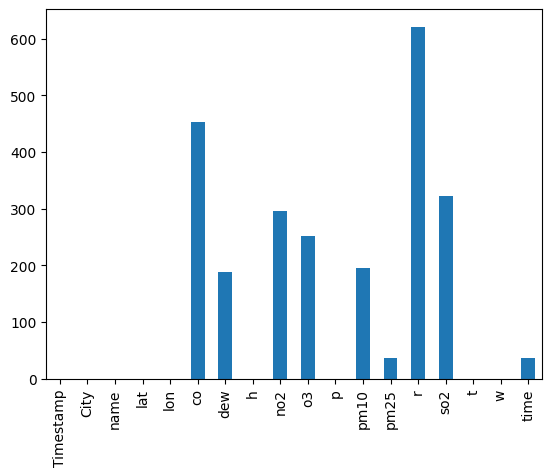

In [8]:
df.isna().sum().plot(kind='bar')

### Feature extraction

In [9]:
df['City'].unique()

array(['Samut Prakan', 'Nakhon Ratchasima', 'Surin', 'Sakon Nakhon',
       'Mueang Khon Kaen', 'Nong Khai', 'Kanchanaburi', 'Suphan Buri',
       'Uthai Thani', 'Nakhon Sawan', 'Phitsanulok', 'Kamphaeng Phet',
       'Lamphun', 'Lampang', 'Phayao', 'Bangkok', 'Trat', 'Nonthaburi',
       'Nan', 'Ubon Ratchathani', 'Samut Sakhon', 'Chiang Mai',
       'Mueang Chiang Rai', 'Ayutthaya', 'Uttaradit', 'Rayong',
       'Pathum Thani', 'Chonburi', 'Nakhon Pathom', 'Ratchaburi',
       'Phuket', 'Yala', 'Krabi', 'Trang', 'Satun', 'Pattani',
       'Narathiwat', 'Prachuap Khiri Khan', 'Saraburi'], dtype=object)

In [10]:
# City type: major and peripheral
city_type = {
    'Samut Prakan': 'Peripheral',
    'Nakhon Ratchasima': 'Major',
    'Surin': 'Peripheral',
    'Sakon Nakhon': 'Peripheral',
    'Mueang Khon Kaen': 'Major',
    'Nong Khai': 'Peripheral',
    'Kanchanaburi': 'Major',
    'Suphan Buri': 'Peripheral',
    'Uthai Thani': 'Peripheral',
    'Nakhon Sawan': 'Peripheral',
    'Phitsanulok': 'Peripheral',
    'Kamphaeng Phet': 'Peripheral',
    'Lamphun': 'Peripheral',
    'Lampang': 'Peripheral',
    'Phayao': 'Peripheral',
    'Bangkok': 'Major',
    'Trat': 'Peripheral',
    'Nonthaburi': 'Peripheral',
    'Nan': 'Peripheral',
    'Ubon Ratchathani': 'Peripheral',
    'Samut Sakhon': 'Peripheral',
    'Chiang Mai': 'Major',
    'Mueang Chiang Rai': 'Peripheral',
    'Ayutthaya': 'Peripheral',
    'Uttaradit': 'Peripheral',
    'Rayong': 'Major',
    'Pathum Thani': 'Peripheral',
    'Chonburi': 'Major',
    'Nakhon Pathom': 'Peripheral',
    'Ratchaburi': 'Peripheral',
    'Phuket': 'Major',
    'Yala': 'Peripheral',
    'Krabi': 'Peripheral',
    'Trang': 'Peripheral',
    'Satun': 'Peripheral',
    'Pattani': 'Peripheral',
    'Narathiwat': 'Peripheral',
    'Prachuap Khiri Khan': 'Peripheral',
    'Saraburi': 'Peripheral',
}

df['City_type'] = df['City'].map(city_type)

In [11]:
# Region: north, northeast, central, south, west, east
city_region = {
    'Samut Prakan': 'Central',
    'Nakhon Ratchasima': 'Northeast',
    'Surin': 'Northeast',
    'Sakon Nakhon': 'Northeast',
    'Mueang Khon Kaen': 'Northeast',
    'Nong Khai': 'Northeast',
    'Kanchanaburi': 'West',
    'Suphan Buri': 'Central',
    'Uthai Thani': 'Central',
    'Nakhon Sawan': 'Central',
    'Phitsanulok': 'Central',
    'Kamphaeng Phet': 'Central',
    'Lamphun': 'North',
    'Lampang': 'North',
    'Phayao': 'North',
    'Bangkok': 'Central',
    'Trat': 'East',
    'Nonthaburi': 'Central',
    'Nan': 'North',
    'Ubon Ratchathani': 'Northeast',
    'Samut Sakhon': 'Central',
    'Chiang Mai': 'North',
    'Mueang Chiang Rai': 'North',
    'Ayutthaya': 'Central',
    'Uttaradit': 'North',
    'Rayong': 'East',
    'Pathum Thani': 'Central',
    'Chonburi': 'East',
    'Nakhon Pathom': 'Central',
    'Ratchaburi': 'West',
    'Phuket': 'South',
    'Yala': 'South',
    'Krabi': 'South',
    'Trang': 'South',
    'Satun': 'South',
    'Pattani': 'South',
    'Narathiwat': 'South',
    'Prachuap Khiri Khan': 'West',
    'Saraburi': 'Central',
}

df['City_region'] = df['City'].map(city_region)

In [12]:
df

,Timestamp,City,name,lat,lon,co,dew,h,no2,o3,p,pm10,pm25,r,so2,t,w,time,City_type,City_region
0,2025-02-19 18:11:33,Samut Prakan,"City Hall, Samut Prakan, Thailand (ศาลากลางจัง...",13.599149,100.597345,0.1,-5.9,8.4,9.3,13.4,1008.5,55.0,110.0,0.6,0.6,31.7,0.5,2025-02-20 00:00:00,Peripheral,Central
1,2025-02-19 18:11:33,Nakhon Ratchasima,"Municipal Waste Water Pumping Station, Nakhon ...",14.979537,102.098335,NaN,-4.6,9.2,11.0,23.7,985.9,NaN,100.0,0.2,0.6,31.9,0.5,2025-02-20 00:00:00,Major,Northeast
2,2025-02-19 18:11:34,Surin,"Pyramid House, Surin, Thailand",14.793612,103.430560,NaN,-4.6,9.2,NaN,NaN,993.9,NaN,NaN,NaN,NaN,32.0,0.5,NaT,Peripheral,Northeast
3,2025-02-19 18:11:34,Sakon Nakhon,"Meteorological stations, Sakon Nakhon, Thailan...",17.156620,104.133216,0.1,-4.9,9.9,NaN,20.1,991.0,43.0,63.0,NaN,1.1,30.2,1.5,2025-02-20 00:00:00,Peripheral,Northeast
4,2025-02-19 18:11:35,Mueang Khon Kaen,"Khonkaen, Thailand (ส่วนอุทกวิทยา สำนักงานทรัพ...",16.445383,102.835250,NaN,-5.2,9.0,NaN,NaN,988.0,NaN,79.0,0.6,NaN,31.5,0.5,2025-02-20 00:00:00,Major,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,2025-03-25 13:00:20,Trang,"Polytechnic College, Trang, Thailand (วิทยาลัย...",7.570238,99.588743,0.1,23.1,64.0,1.2,NaN,1006.7,54.0,81.0,99.0,0.6,32.7,1.0,2025-03-25 19:00:00,Peripheral,South
1282,2025-03-25 13:00:20,Satun,"Phiman, Satun, Satun, Thailand (ต.พิมาน อ.เมือ...",6.624747,100.066159,0.1,-6.2,7.5,1.8,6.4,1006.1,21.0,71.0,1.5,0.6,33.4,1.5,2025-03-25 19:00:00,Peripheral,South
1283,2025-03-25 13:00:21,Narathiwat,"City Hall, Narathiwat, Thailand (ศาลากลางจังหว...",6.426853,101.823388,NaN,-5.8,7.8,NaN,NaN,1006.4,NaN,72.0,0.1,NaN,33.2,3.0,2025-03-25 19:00:00,Peripheral,South
1284,2025-03-25 13:00:21,Prachuap Khiri Khan,"Prachuap Khiri Khan - Gaia Station 10, Thailand",11.800270,99.790596,NaN,-4.8,8.3,NaN,NaN,996.7,57.0,133.0,NaN,NaN,33.5,6.1,2025-03-25 19:00:00,Peripheral,West


In [13]:
df.groupby(['City_type'])['City'].nunique()

City_type
Major          8
Peripheral    31
Name: City, dtype: int64

In [14]:
df.groupby(['City_region'])['City'].nunique()

City_region
Central      13
East          3
North         7
Northeast     6
South         7
West          3
Name: City, dtype: int64

In [15]:
df.groupby(['City_region', 'City_type'])['City'].nunique()

City_region  City_type 
Central      Major          1
             Peripheral    12
East         Major          2
             Peripheral     1
North        Major          1
             Peripheral     6
Northeast    Major          2
             Peripheral     4
South        Major          1
             Peripheral     6
West         Major          1
             Peripheral     2
Name: City, dtype: int64

## Exploratory Data Analysis

### AQI metrics between major and peripheral cities as time series

Finding: Based on the visualizations, AQI metrics between major and peripheral cities tend to be similar across time.

In [16]:
# create a new dataframe containing average AQI metric by city type
mean_aqi_city_type = df.groupby(['time', 'City_region', 'City_type'])[['co', 'dew', 'h', 'no2', 'o3', 'p', 'pm10', 'pm25', 'r', 'so2', 't', 'w']].mean().reset_index()

mean_aqi_city_type = mean_aqi_city_type[mean_aqi_city_type['time'] > '2025-01-01 00:00:00']

mean_aqi_city_type

,time,City_region,City_type,co,dew,h,no2,o3,p,pm10,pm25,r,so2,t,w
4,2025-02-19 12:00:00,North,Peripheral,NaN,21.7000,81.900000,3.5000,14.200000,1002.500000,51.000000,120.000000,NaN,0.600000,23.000000,1.000000
5,2025-02-20 00:00:00,Central,Major,0.1,NaN,8.200000,2.9000,13.100000,1008.900000,56.000000,120.000000,2.000,0.600000,31.700000,2.000000
6,2025-02-20 00:00:00,Central,Peripheral,0.1,0.9875,24.822222,8.1875,7.888889,1008.177778,47.555556,83.777778,25.600,1.588889,31.366667,1.722222
7,2025-02-20 00:00:00,East,Major,0.1,-6.3000,8.800000,10.1500,11.300000,1005.950000,35.000000,81.500000,0.750,1.650000,29.450000,1.750000
8,2025-02-20 00:00:00,East,Peripheral,0.1,-7.2000,8.000000,0.6000,14.200000,1005.000000,40.000000,81.000000,1.300,0.600000,30.800000,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2025-03-25 19:00:00,Northeast,Peripheral,0.1,4.2000,19.733333,4.3500,13.050000,995.366667,80.333333,164.666667,NaN,0.600000,33.966667,2.000000
497,2025-03-25 19:00:00,South,Major,0.1,-5.6000,8.200000,3.5000,NaN,1007.700000,46.000000,72.000000,99.900,0.600000,32.700000,2.000000
498,2025-03-25 19:00:00,South,Peripheral,0.1,1.2000,21.725000,1.5000,6.400000,1005.650000,37.500000,74.000000,50.025,0.600000,33.075000,1.875000
499,2025-03-25 19:00:00,West,Major,0.1,-4.2000,7.800000,NaN,6.700000,1004.600000,47.000000,125.000000,NaN,NaN,35.500000,1.000000


In [17]:
def plot_aqi_region_type(df, aqi_metric):
    fig, axes = plt.subplots(2, 3, figsize=(30, 10), sharex=True, sharey=True)

    hue_order = ['Major', 'Peripheral']

    sns.lineplot(ax=axes[0, 0], data=df[df['City_region'] == 'North'], x='time', y=aqi_metric, hue='City_type', hue_order=hue_order)
    axes[0, 0].set_title('Northern region')
    axes[0, 0].tick_params('x', labelrotation=45)
    axes[0, 0].legend(loc='upper left', title='City type')

    sns.lineplot(ax=axes[0, 1], data=df[df['City_region'] == 'Northeast'], x='time', y=aqi_metric, hue='City_type', hue_order=hue_order)
    axes[0, 1].set_title('Northeastern region')
    axes[0, 1].tick_params('x', labelrotation=45)
    axes[0, 1].legend(loc='upper left', title='City type')

    sns.lineplot(ax=axes[0, 2], data=df[df['City_region'] == 'Central'], x='time', y=aqi_metric, hue='City_type', hue_order=hue_order)
    axes[0, 2].set_title('Central region')
    axes[0, 2].tick_params('x', labelrotation=45)
    axes[0, 2].legend(loc='upper left', title='City type')

    sns.lineplot(ax=axes[1, 0], data=df[df['City_region'] == 'West'], x='time', y=aqi_metric, hue='City_type', hue_order=hue_order)
    axes[1, 0].set_title('Western region')
    axes[1, 0].tick_params('x', labelrotation=45)
    axes[1, 0].legend(loc='upper left', title='City type')

    sns.lineplot(ax=axes[1, 1], data=df[df['City_region'] == 'East'], x='time', y=aqi_metric, hue='City_type', hue_order=hue_order)
    axes[1, 1].set_title('Eastern region')
    axes[1, 1].tick_params('x', labelrotation=45)
    axes[1, 1].legend(loc='upper left', title='City type')

    sns.lineplot(ax=axes[1, 2], data=df[df['City_region'] == 'South'], x='time', y=aqi_metric, hue='City_type', hue_order=hue_order)
    axes[1, 2].set_title('Southern region')
    axes[1, 2].tick_params('x', labelrotation=45)
    axes[1, 2].legend(loc='upper left', title='City type')

    fig.suptitle(f'Average {aqi_metric} per day between major and peripheral cities', fontsize=16)
    plt.show(); plt.close('all');

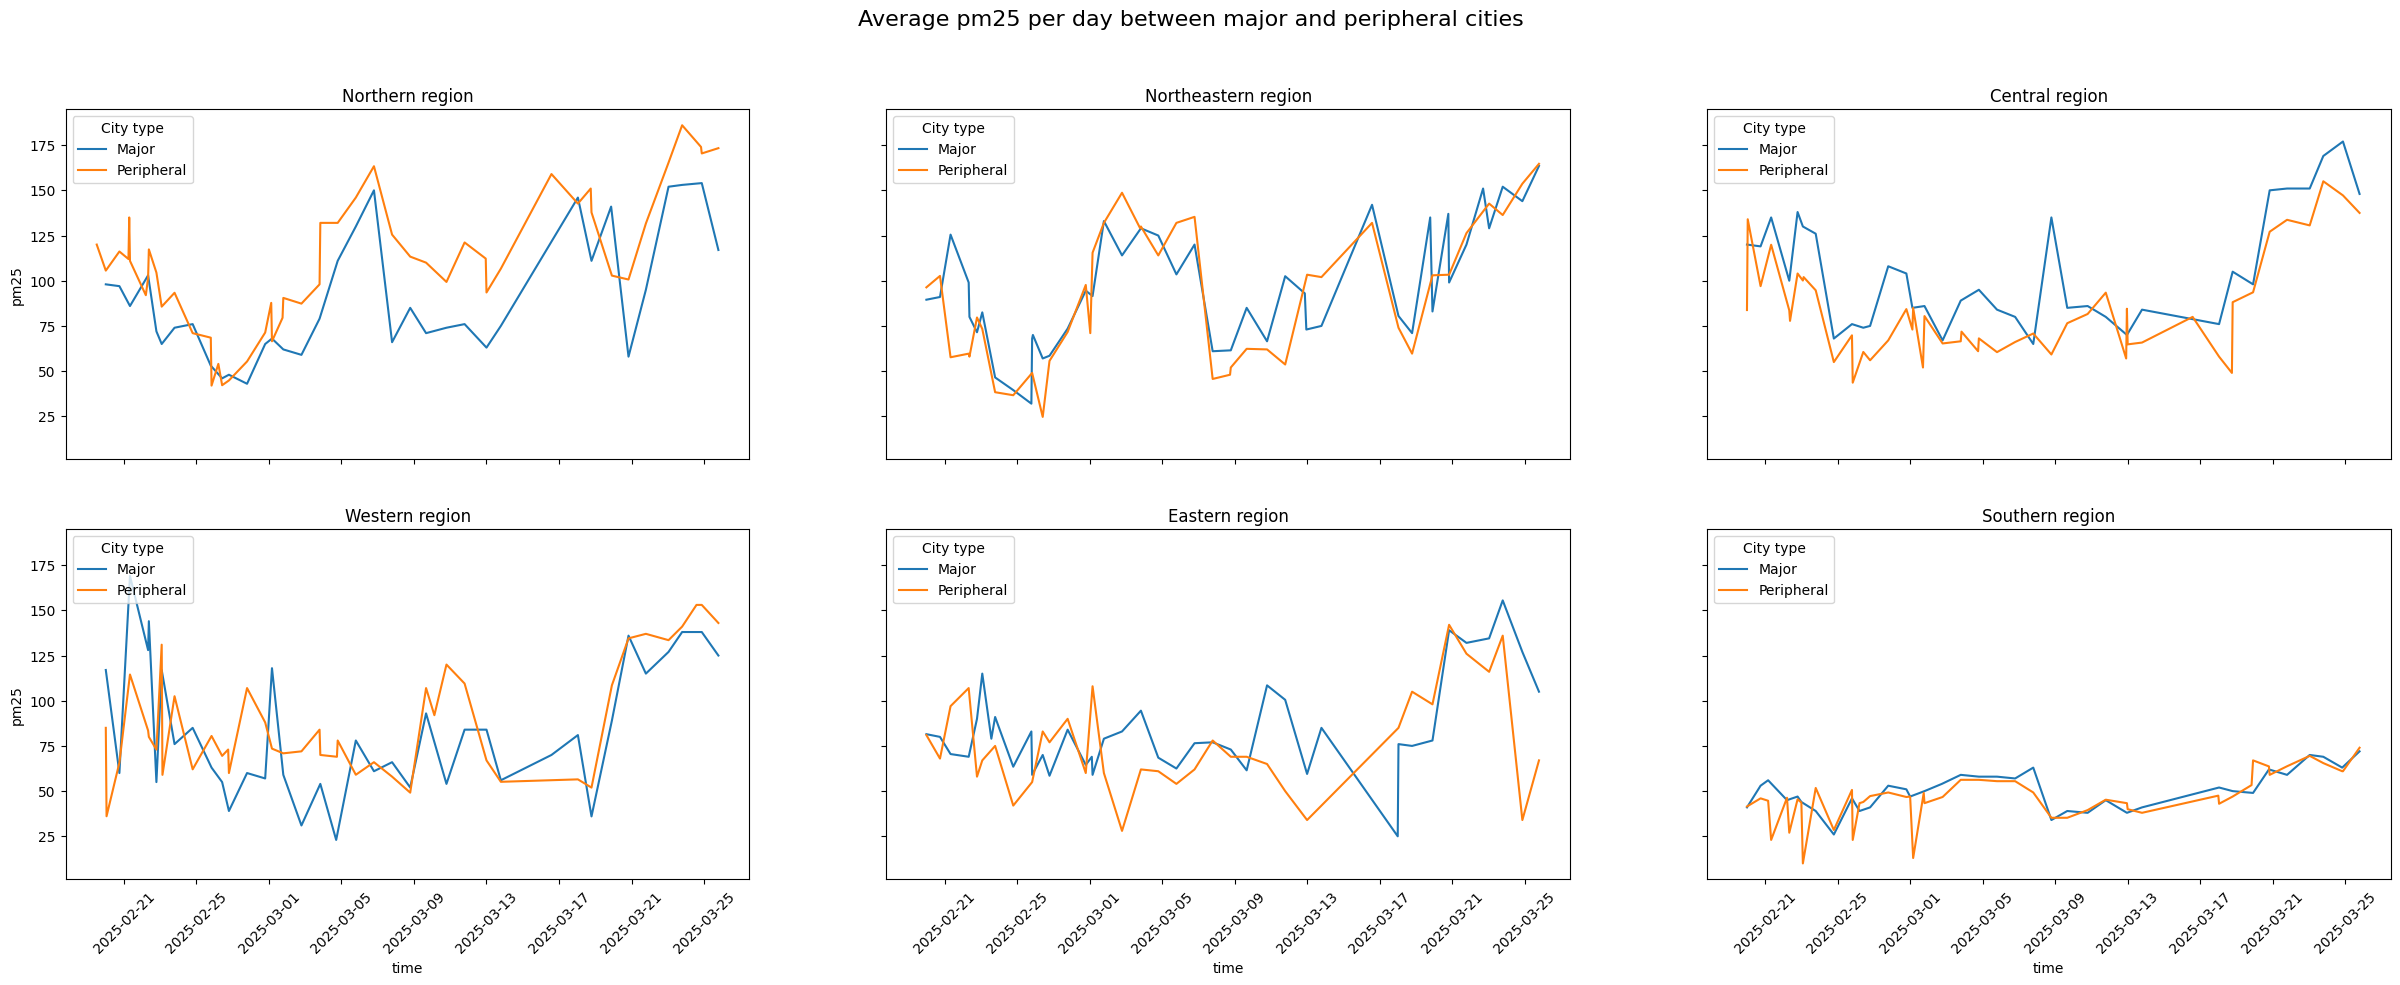

In [18]:
plot_aqi_region_type(mean_aqi_city_type, aqi_metric='pm25')

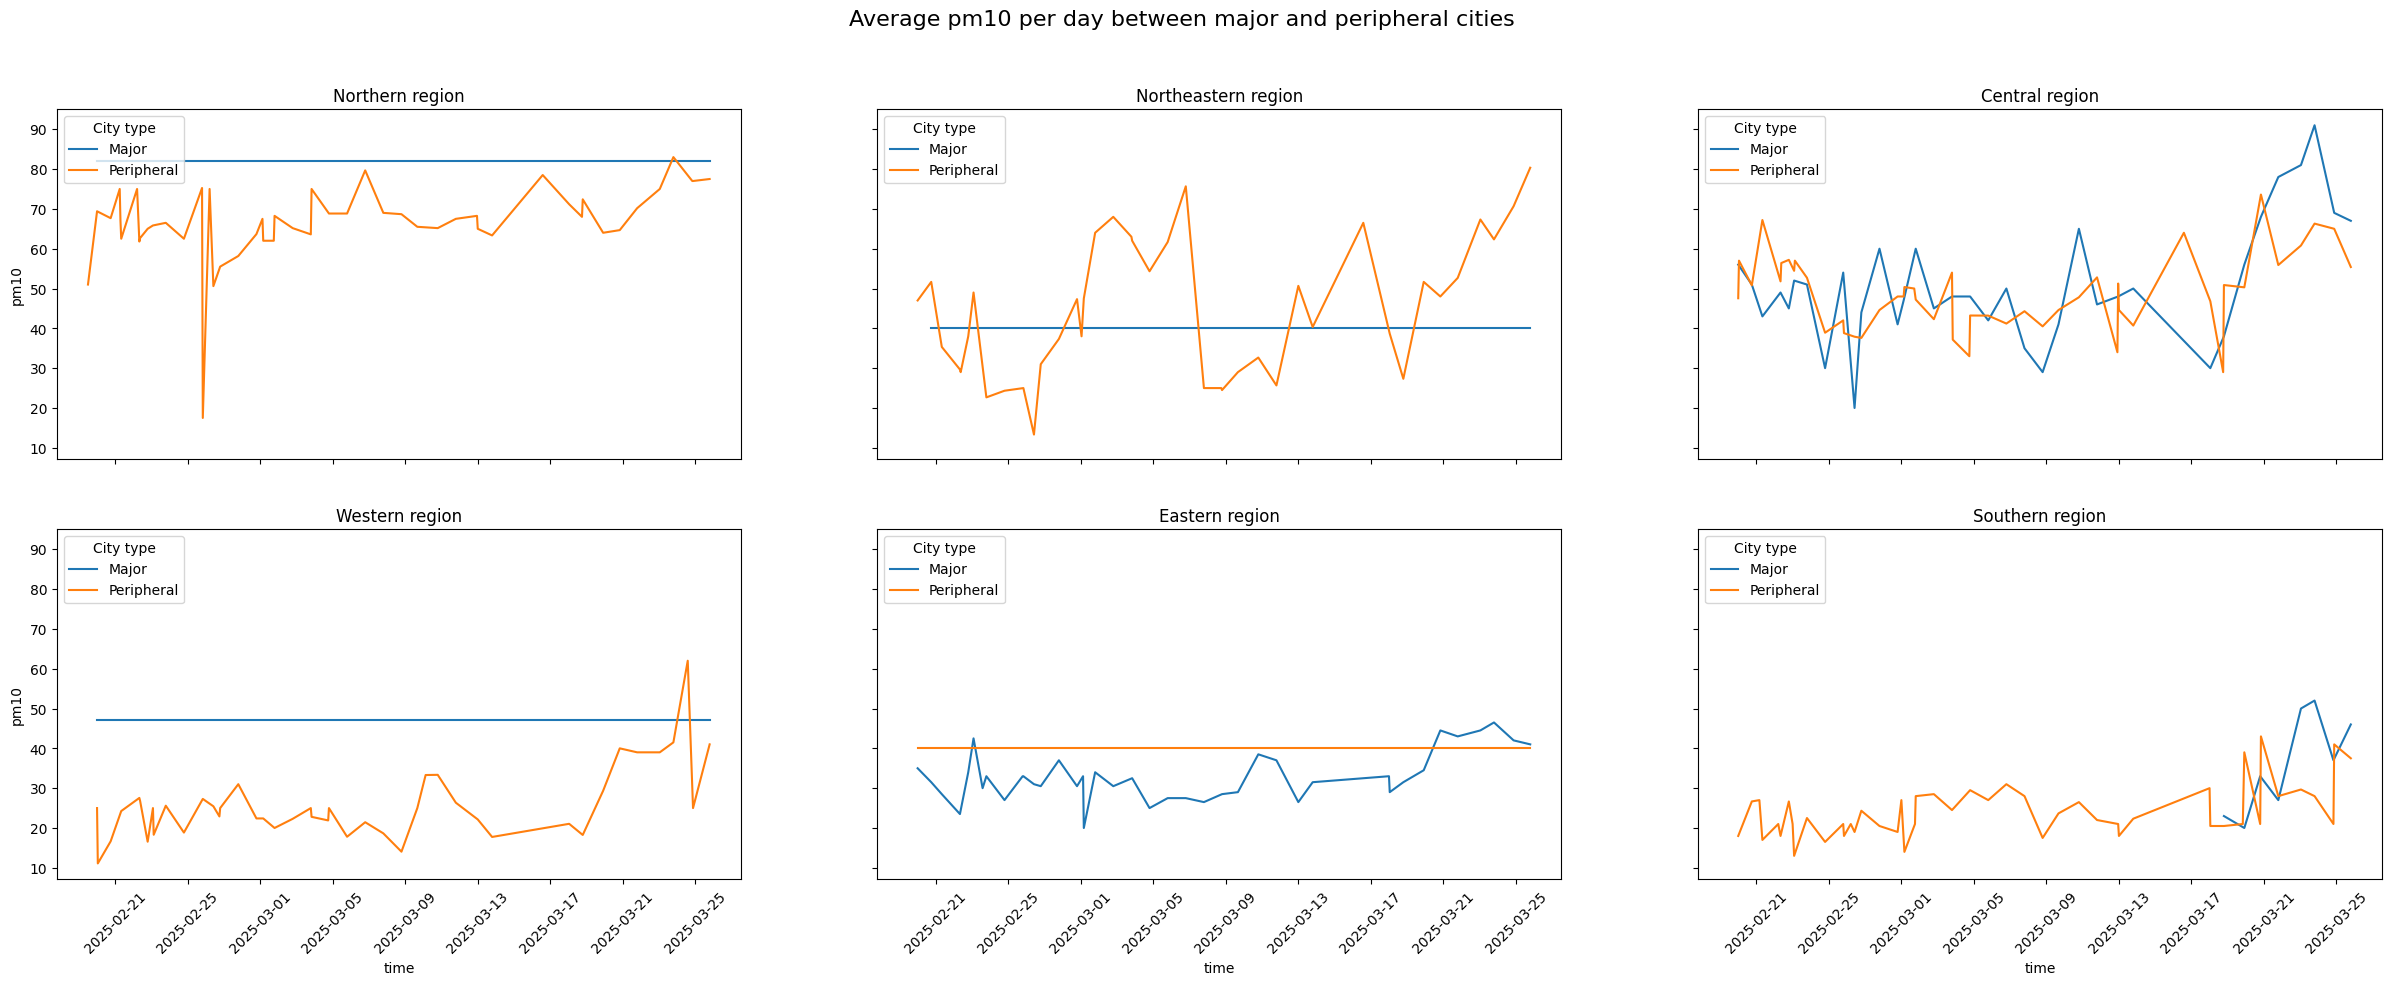

In [19]:
plot_aqi_region_type(mean_aqi_city_type, aqi_metric='pm10')

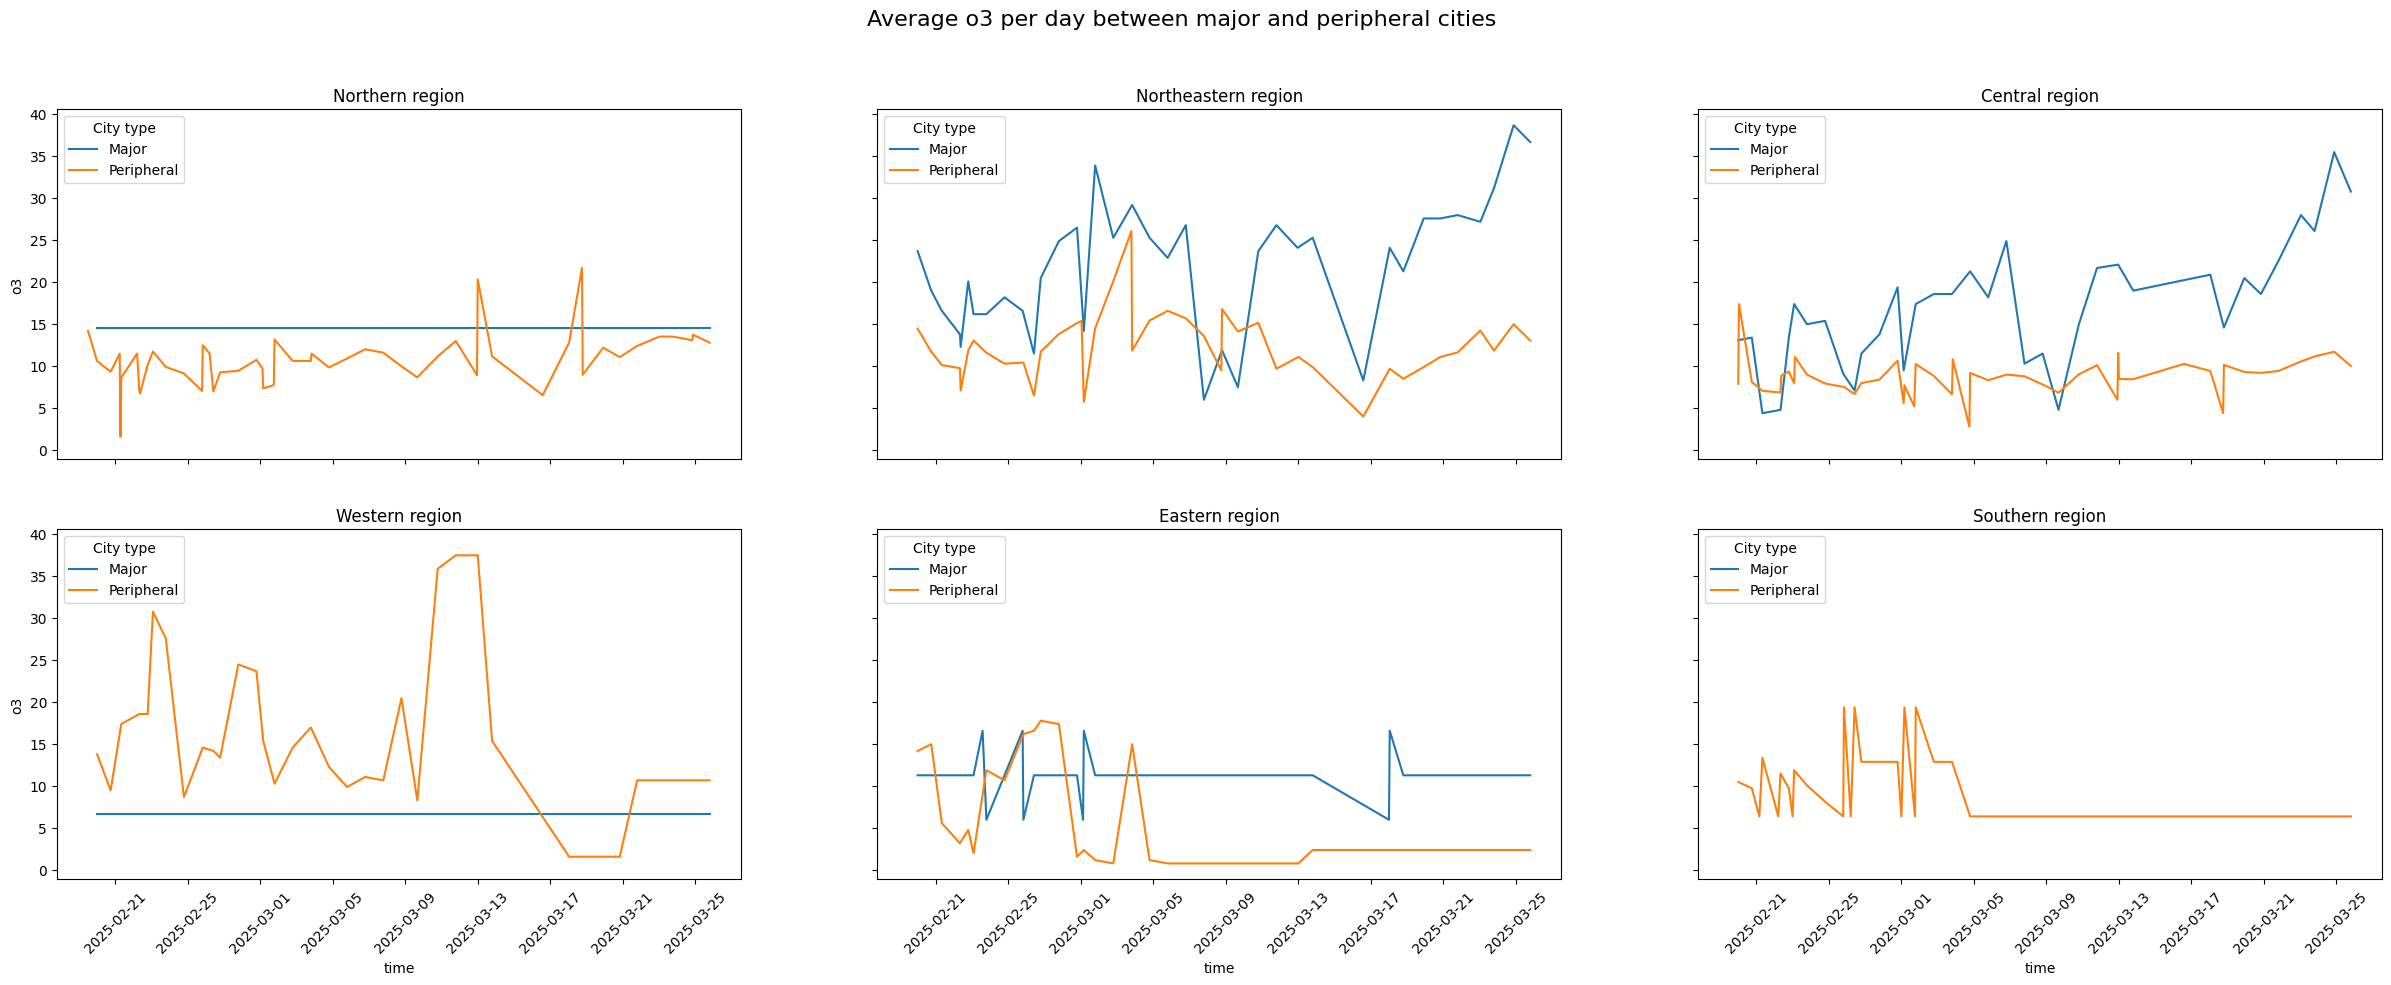

In [20]:
plot_aqi_region_type(mean_aqi_city_type, aqi_metric='o3')

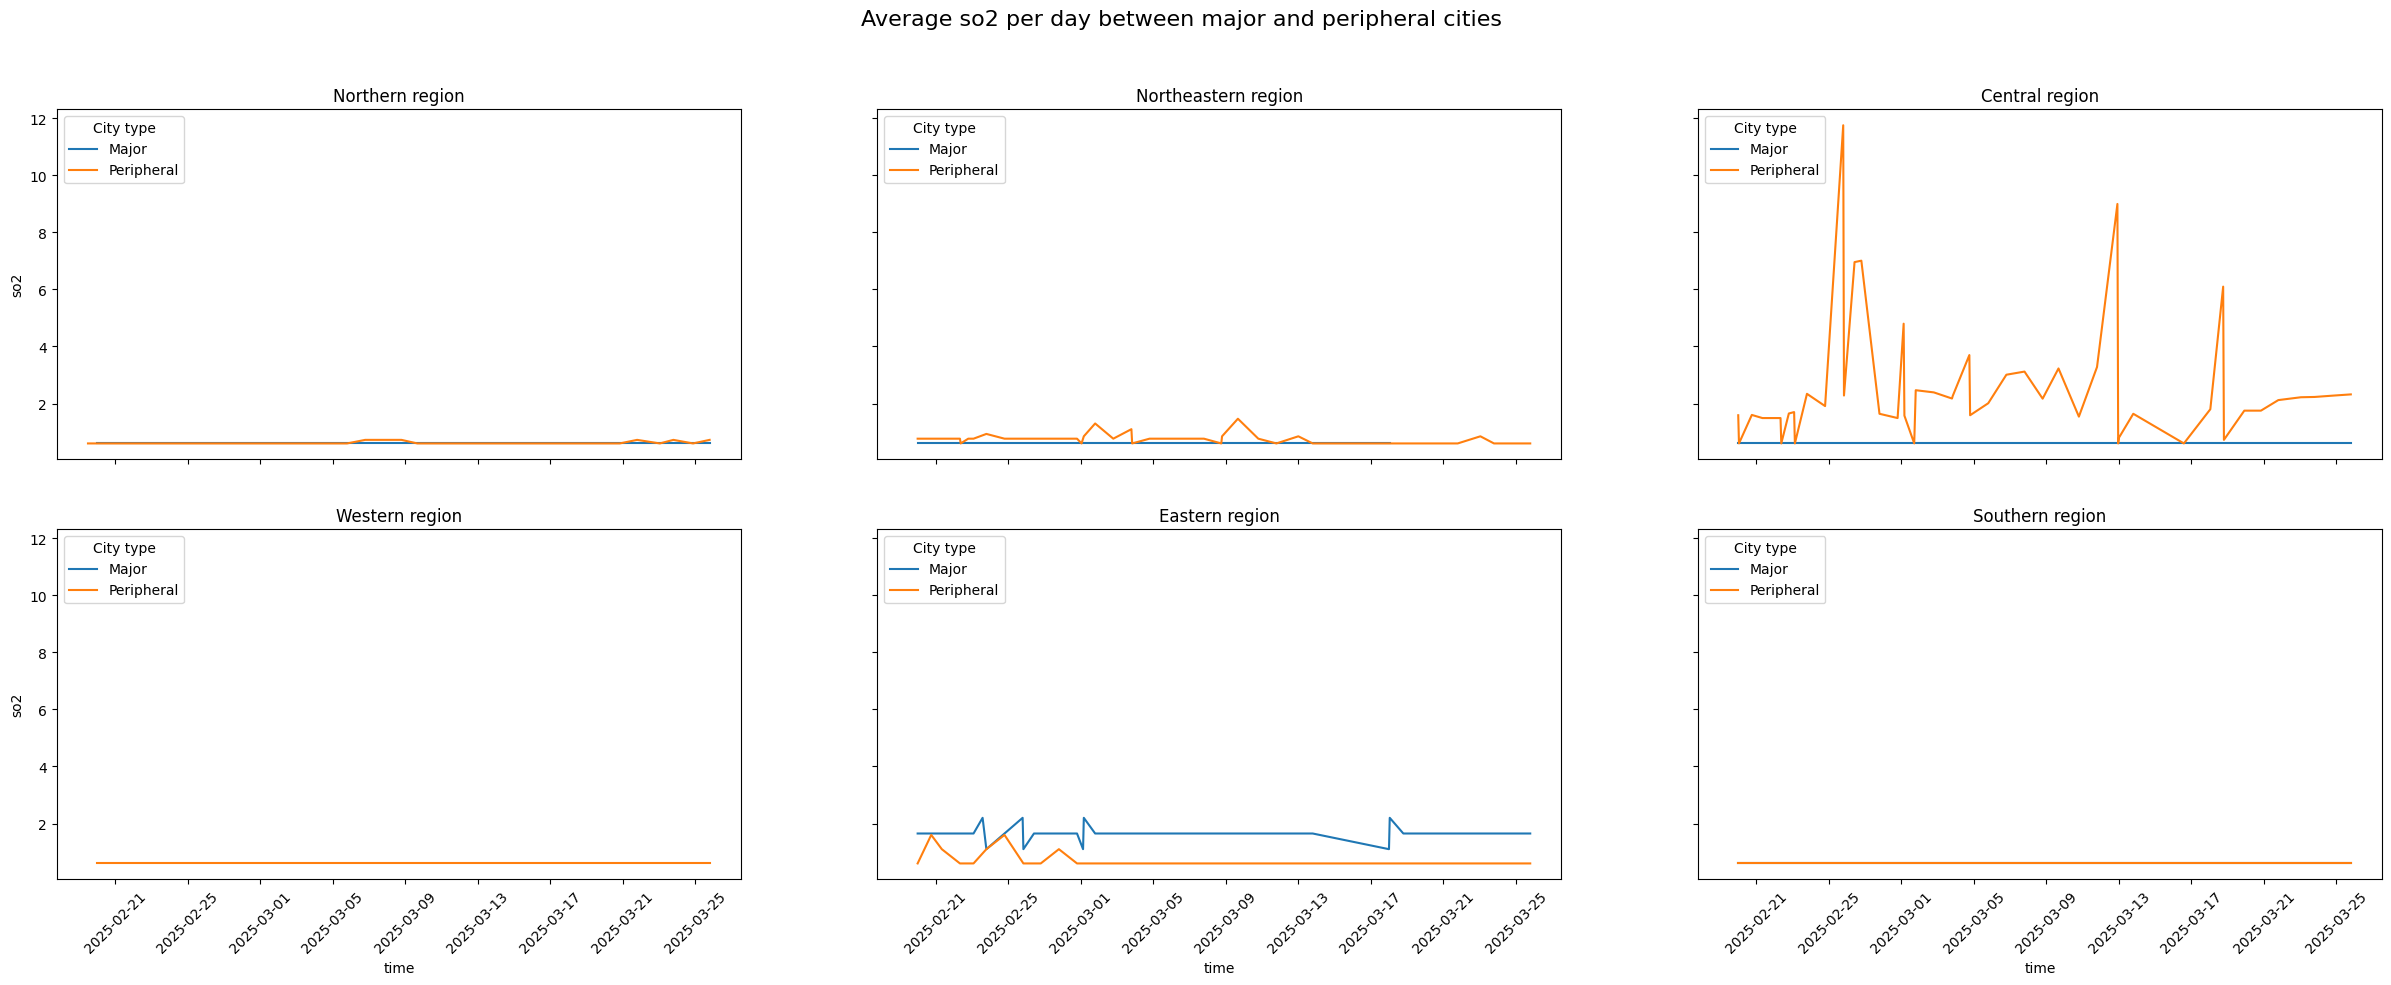

In [21]:
plot_aqi_region_type(mean_aqi_city_type, aqi_metric='so2')

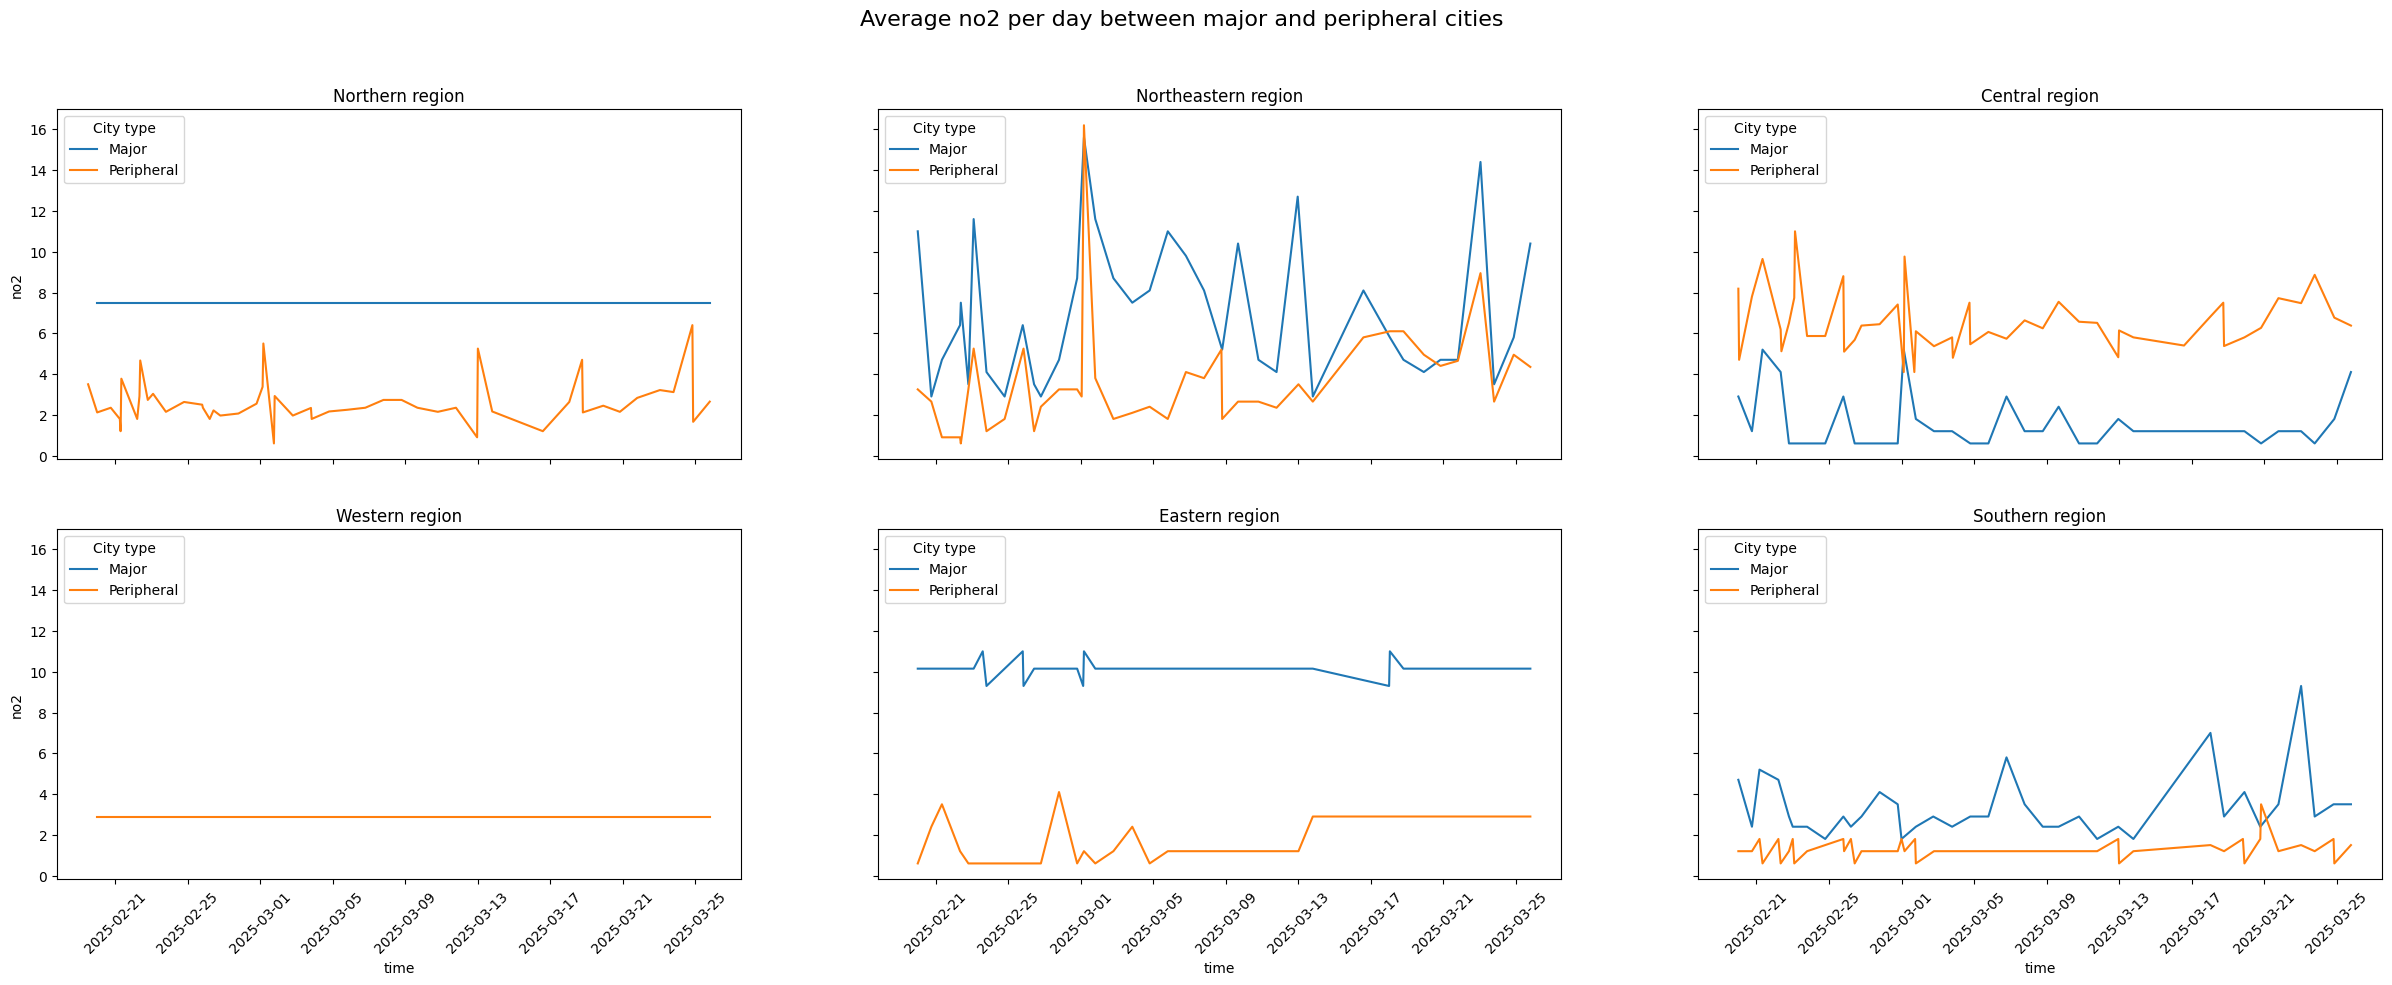

In [22]:
plot_aqi_region_type(mean_aqi_city_type, aqi_metric='no2')

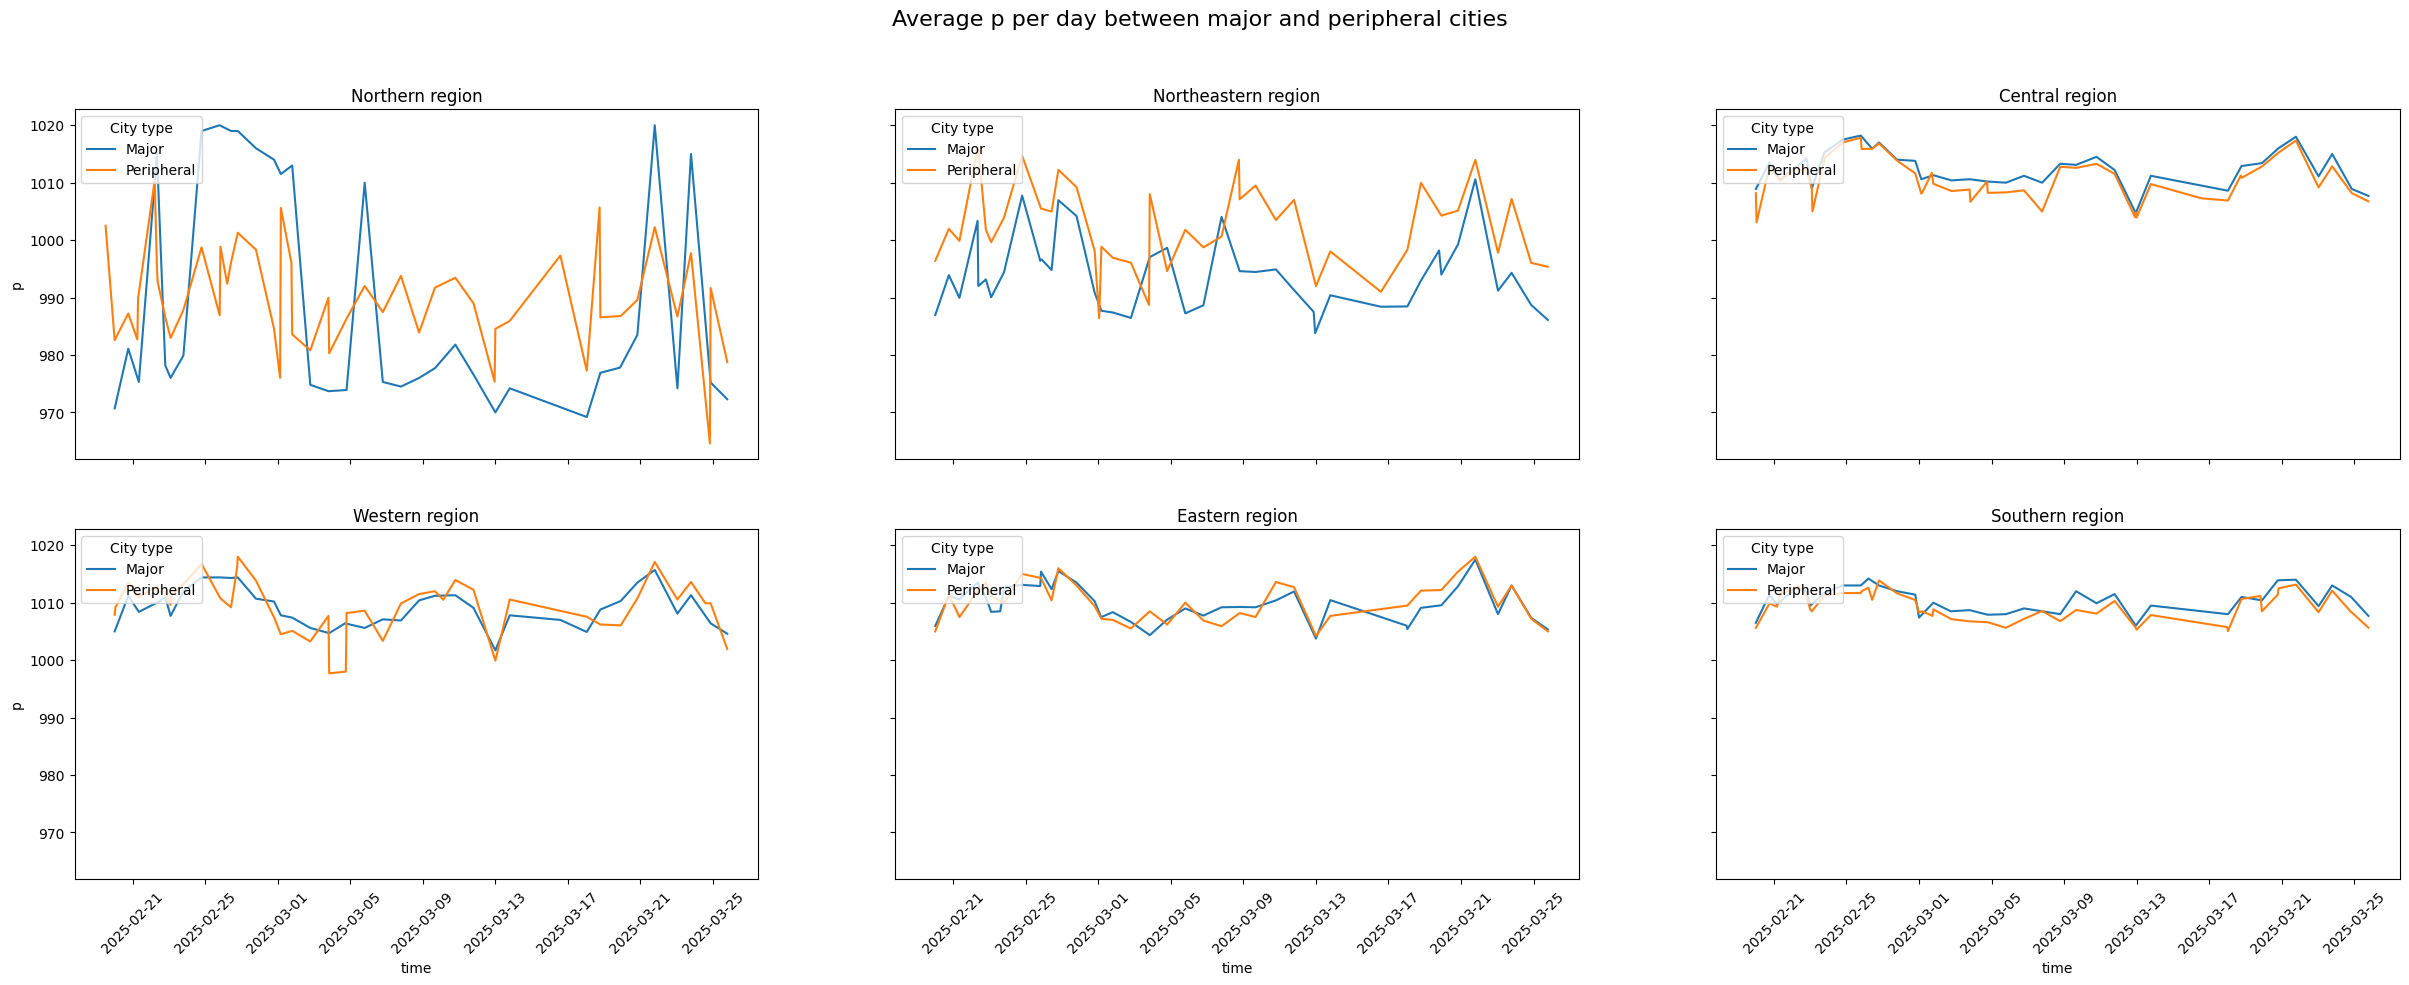

In [23]:
plot_aqi_region_type(mean_aqi_city_type, aqi_metric='p')

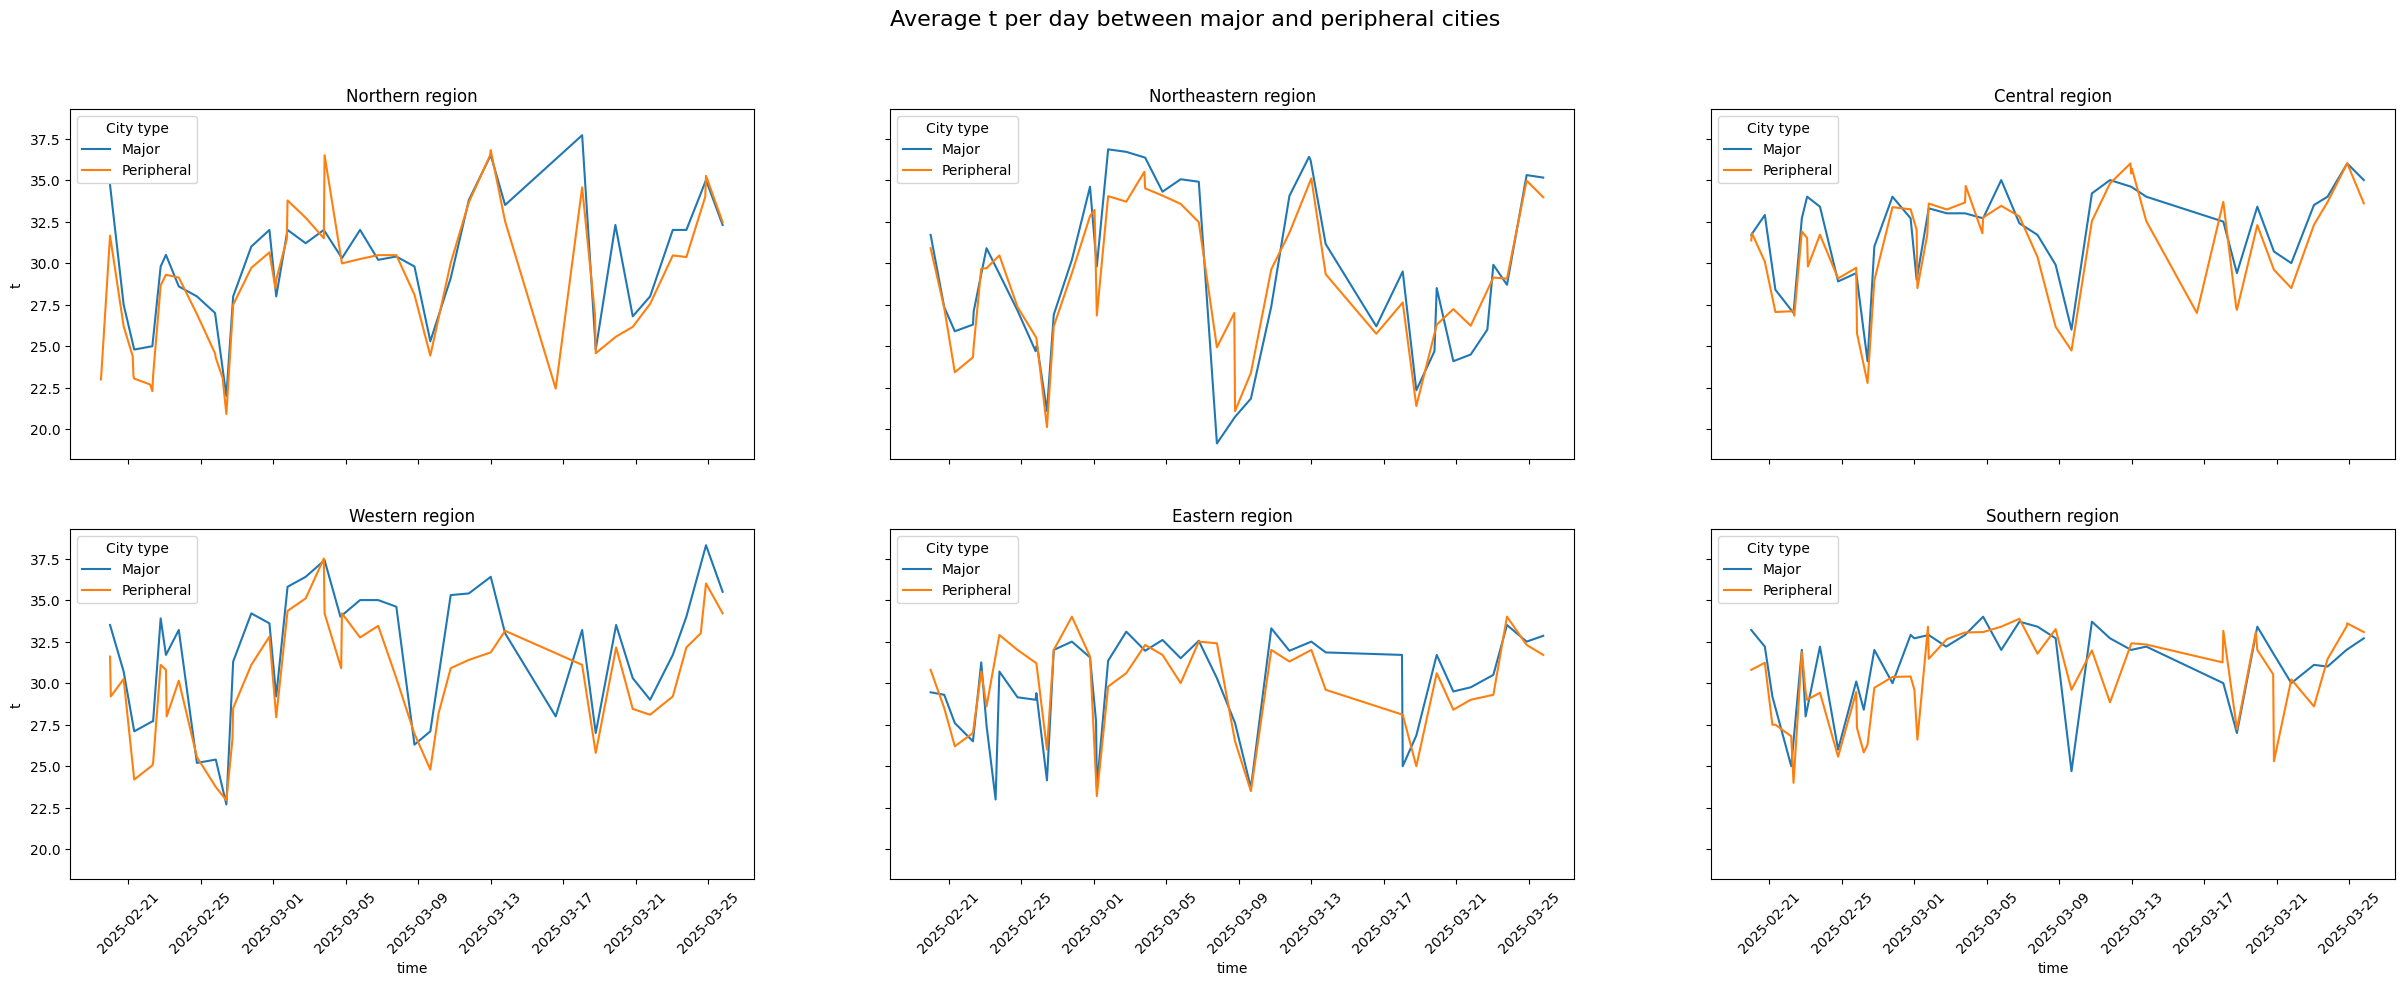

In [24]:
plot_aqi_region_type(mean_aqi_city_type, aqi_metric='t')

### Distribution of AQI metrics between major and peripheral cities

Findings
1. pm2.5 between peripheral and major cities have similar distribution. Specifically, the distributions have two peaks and the median of the distribution is similar. However, pm2.5 of peripheral cities tend to be more spread out than pm2.5 of major cities.

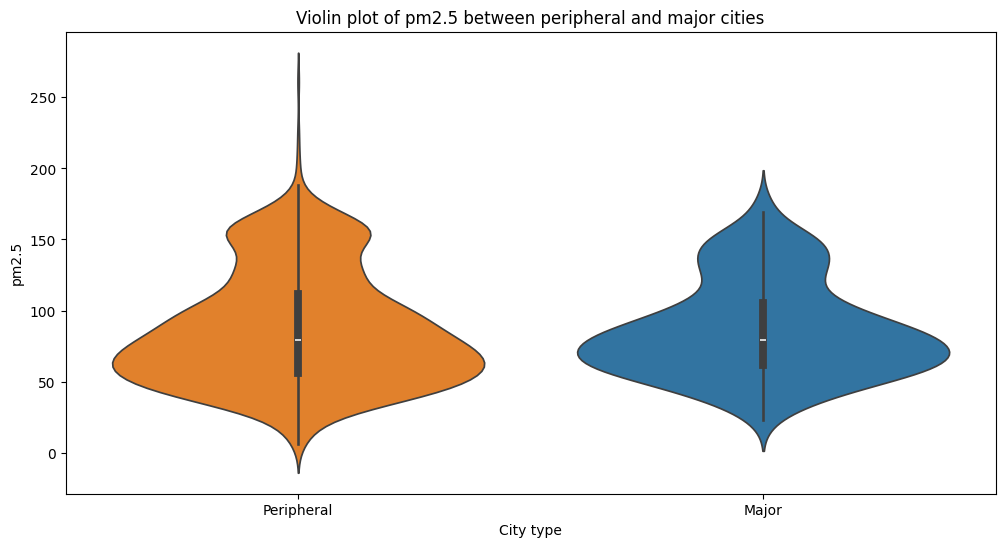

In [25]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='City_type', y='pm25', hue='City_type', hue_order=['Major', 'Peripheral'])
plt.title('Violin plot of pm2.5 between peripheral and major cities')
plt.xlabel('City type')
plt.ylabel('pm2.5')
plt.show(); plt.close('all');

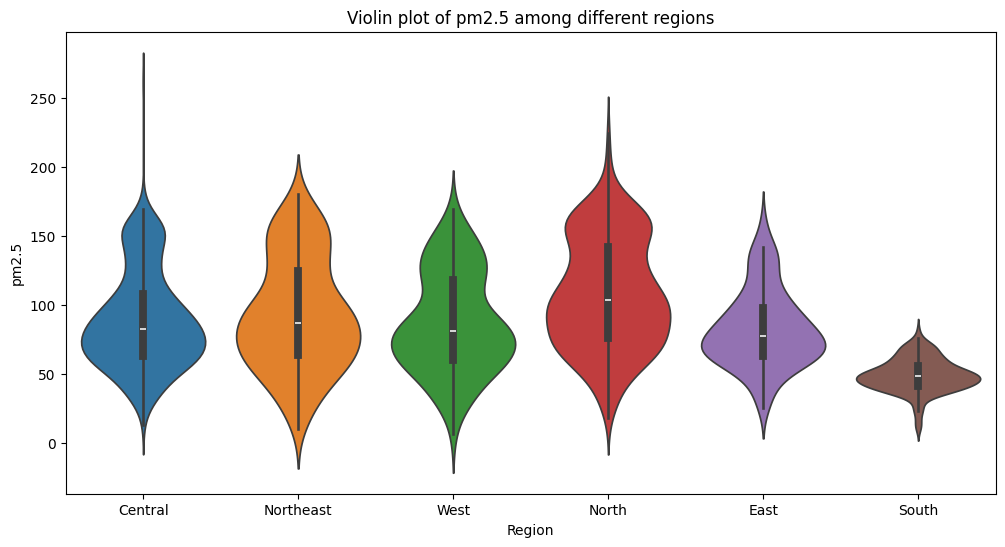

In [26]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='City_region', y='pm25', hue='City_region')
plt.title('Violin plot of pm2.5 among different regions')
plt.xlabel('Region')
plt.ylabel('pm2.5')
plt.show(); plt.close('all');

In [27]:
def aqi_distribution(df, aqi_metric):
    fig, axes = plt.subplots(2, 3, figsize=(30, 10), sharex=True)

    hue_order = ['Major', 'Peripheral']

    sns.violinplot(ax=axes[0, 0], data=df[df['City_region'] == 'North'], x='City_type', y=aqi_metric, fill=True, hue='City_type', hue_order=hue_order)
    axes[0, 0].set_title('Northern region')

    sns.violinplot(ax=axes[0, 1], data=df[df['City_region'] == 'Northeast'], x='City_type', y=aqi_metric, fill=True, hue='City_type', hue_order=hue_order)
    axes[0, 1].set_title('Northeastern region')

    sns.violinplot(ax=axes[0, 2], data=df[df['City_region'] == 'Central'], x='City_type', y=aqi_metric, fill=True, hue='City_type', hue_order=hue_order)
    axes[0, 2].set_title('Central region')

    sns.violinplot(ax=axes[1, 0], data=df[df['City_region'] == 'West'], x='City_type', y=aqi_metric, fill=True, hue='City_type', hue_order=hue_order)
    axes[1, 0].set_title('Western region')

    sns.violinplot(ax=axes[1, 1], data=df[df['City_region'] == 'East'], x='City_type', y=aqi_metric, fill=True, hue='City_type', hue_order=hue_order)
    axes[1, 1].set_title('Eastern region')

    sns.violinplot(ax=axes[1, 2], data=df[df['City_region'] == 'South'], x='City_type', y=aqi_metric, fill=True, hue='City_type', hue_order=hue_order)
    axes[1, 2].set_title('Southern region')

    fig.suptitle(f'Distribution of {aqi_metric} between major and peripheral cities', fontsize=16)
    plt.show(); plt.close('all');

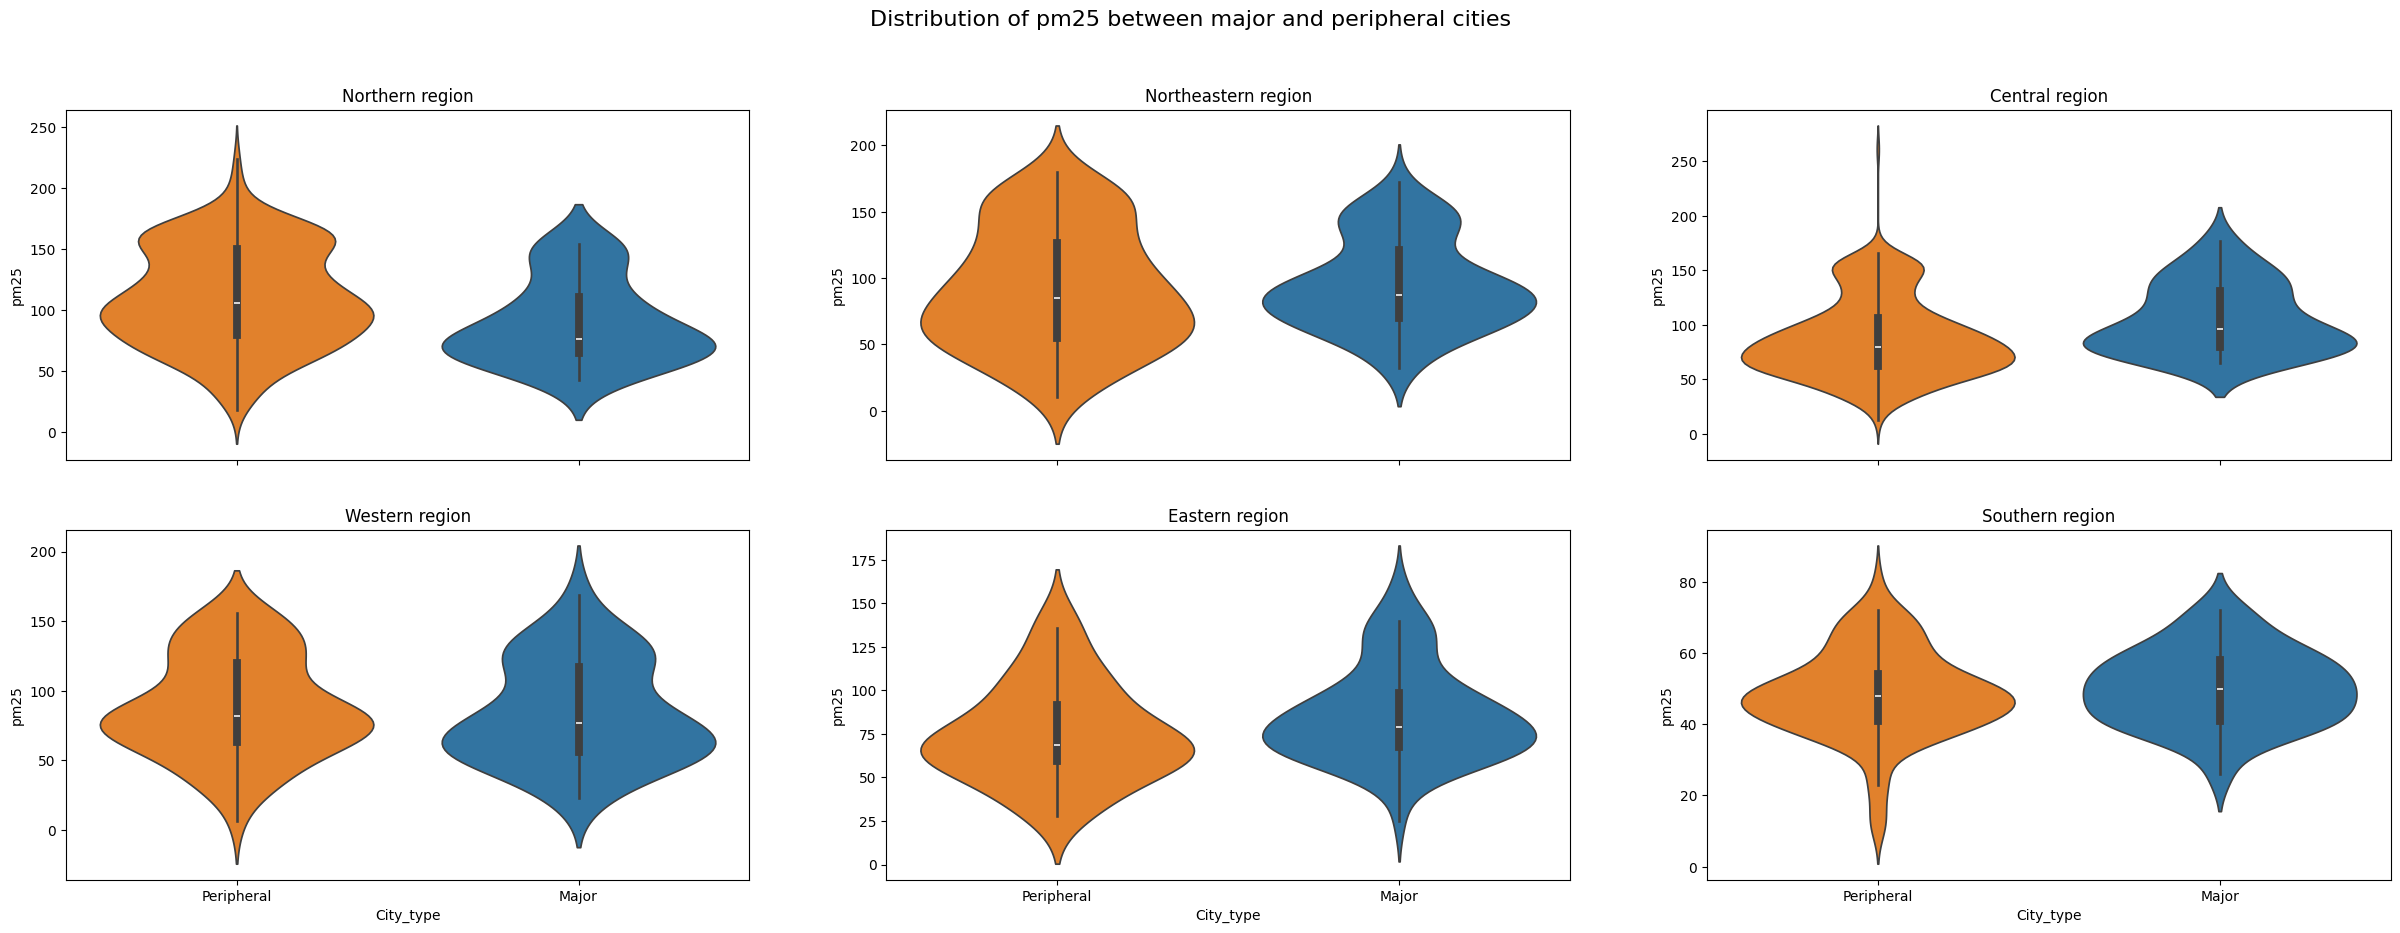

In [28]:
aqi_distribution(df, aqi_metric='pm25')

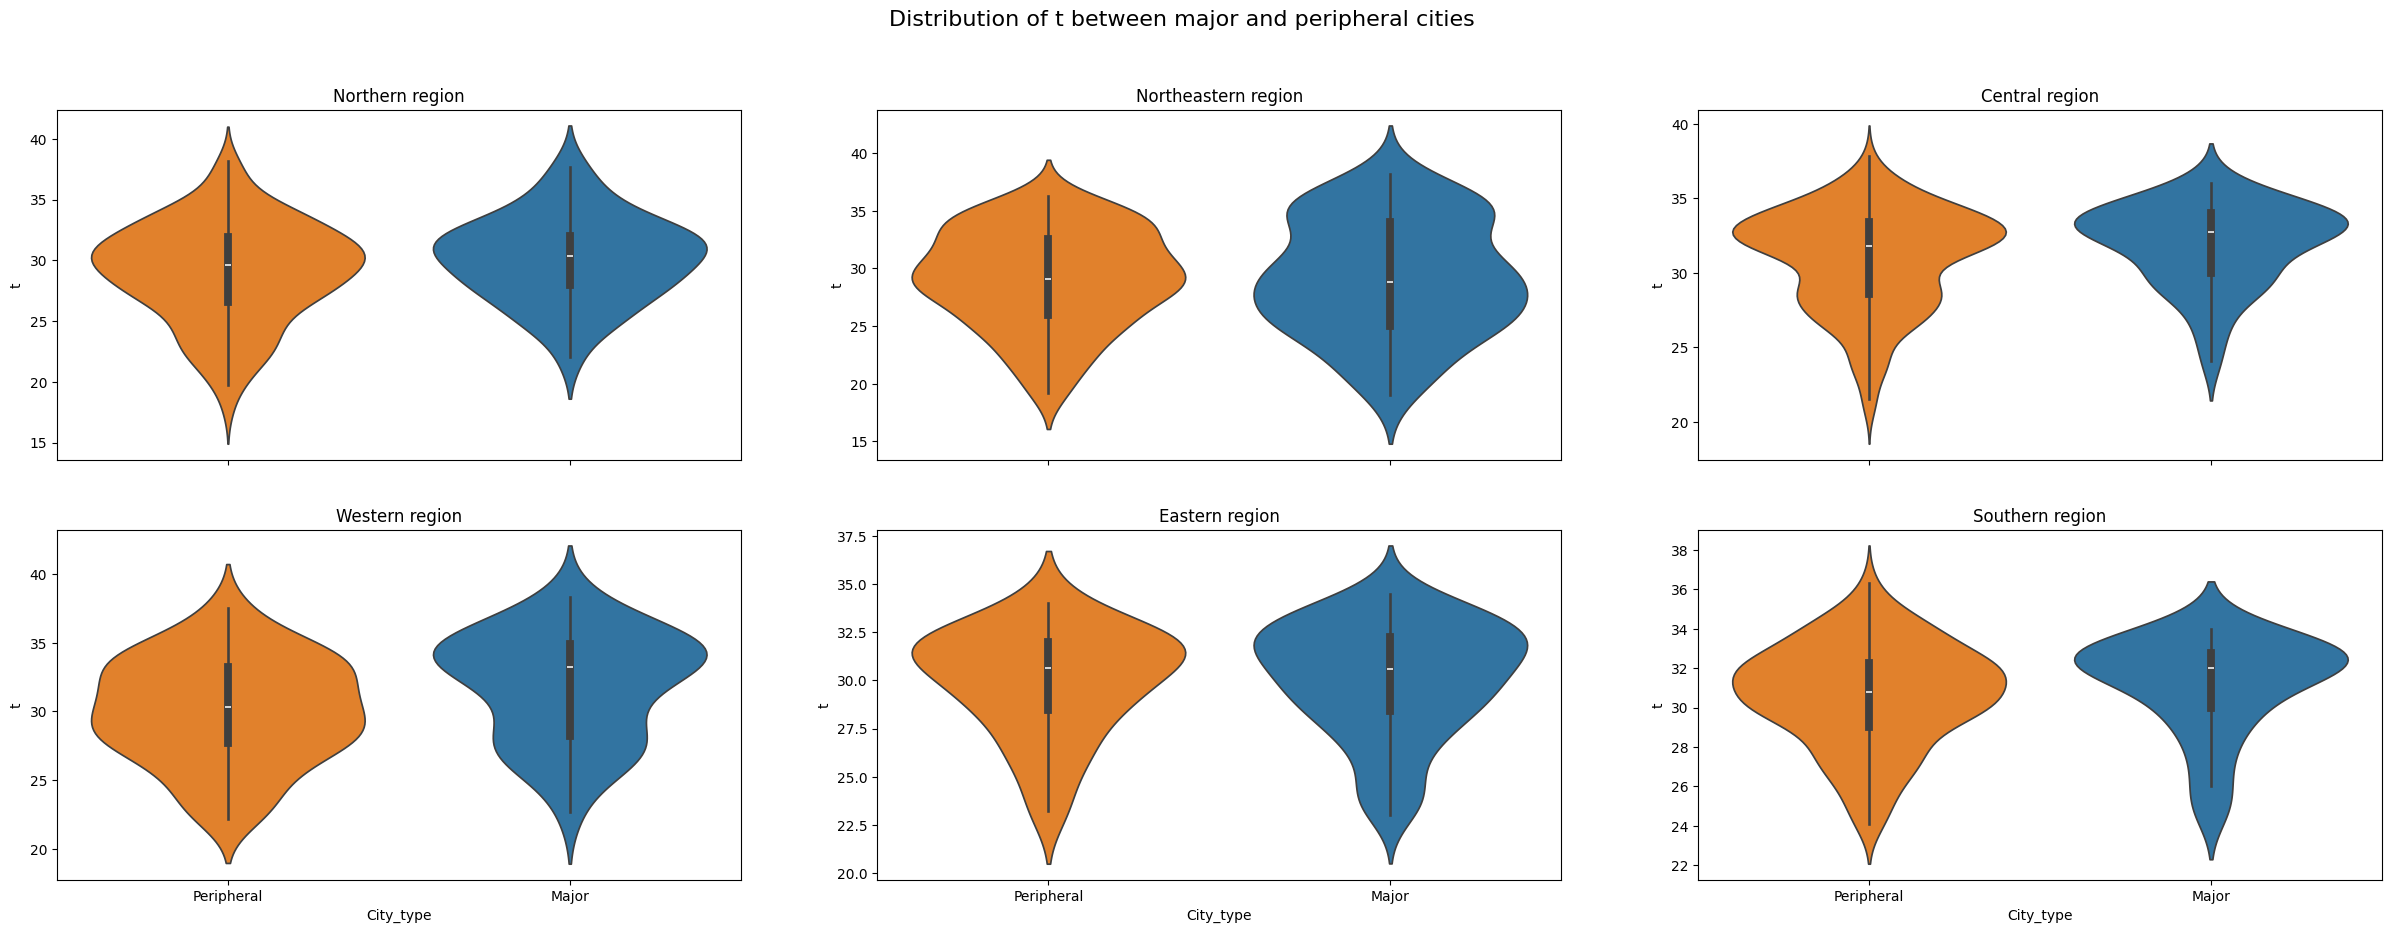

In [29]:
aqi_distribution(df, aqi_metric='t')

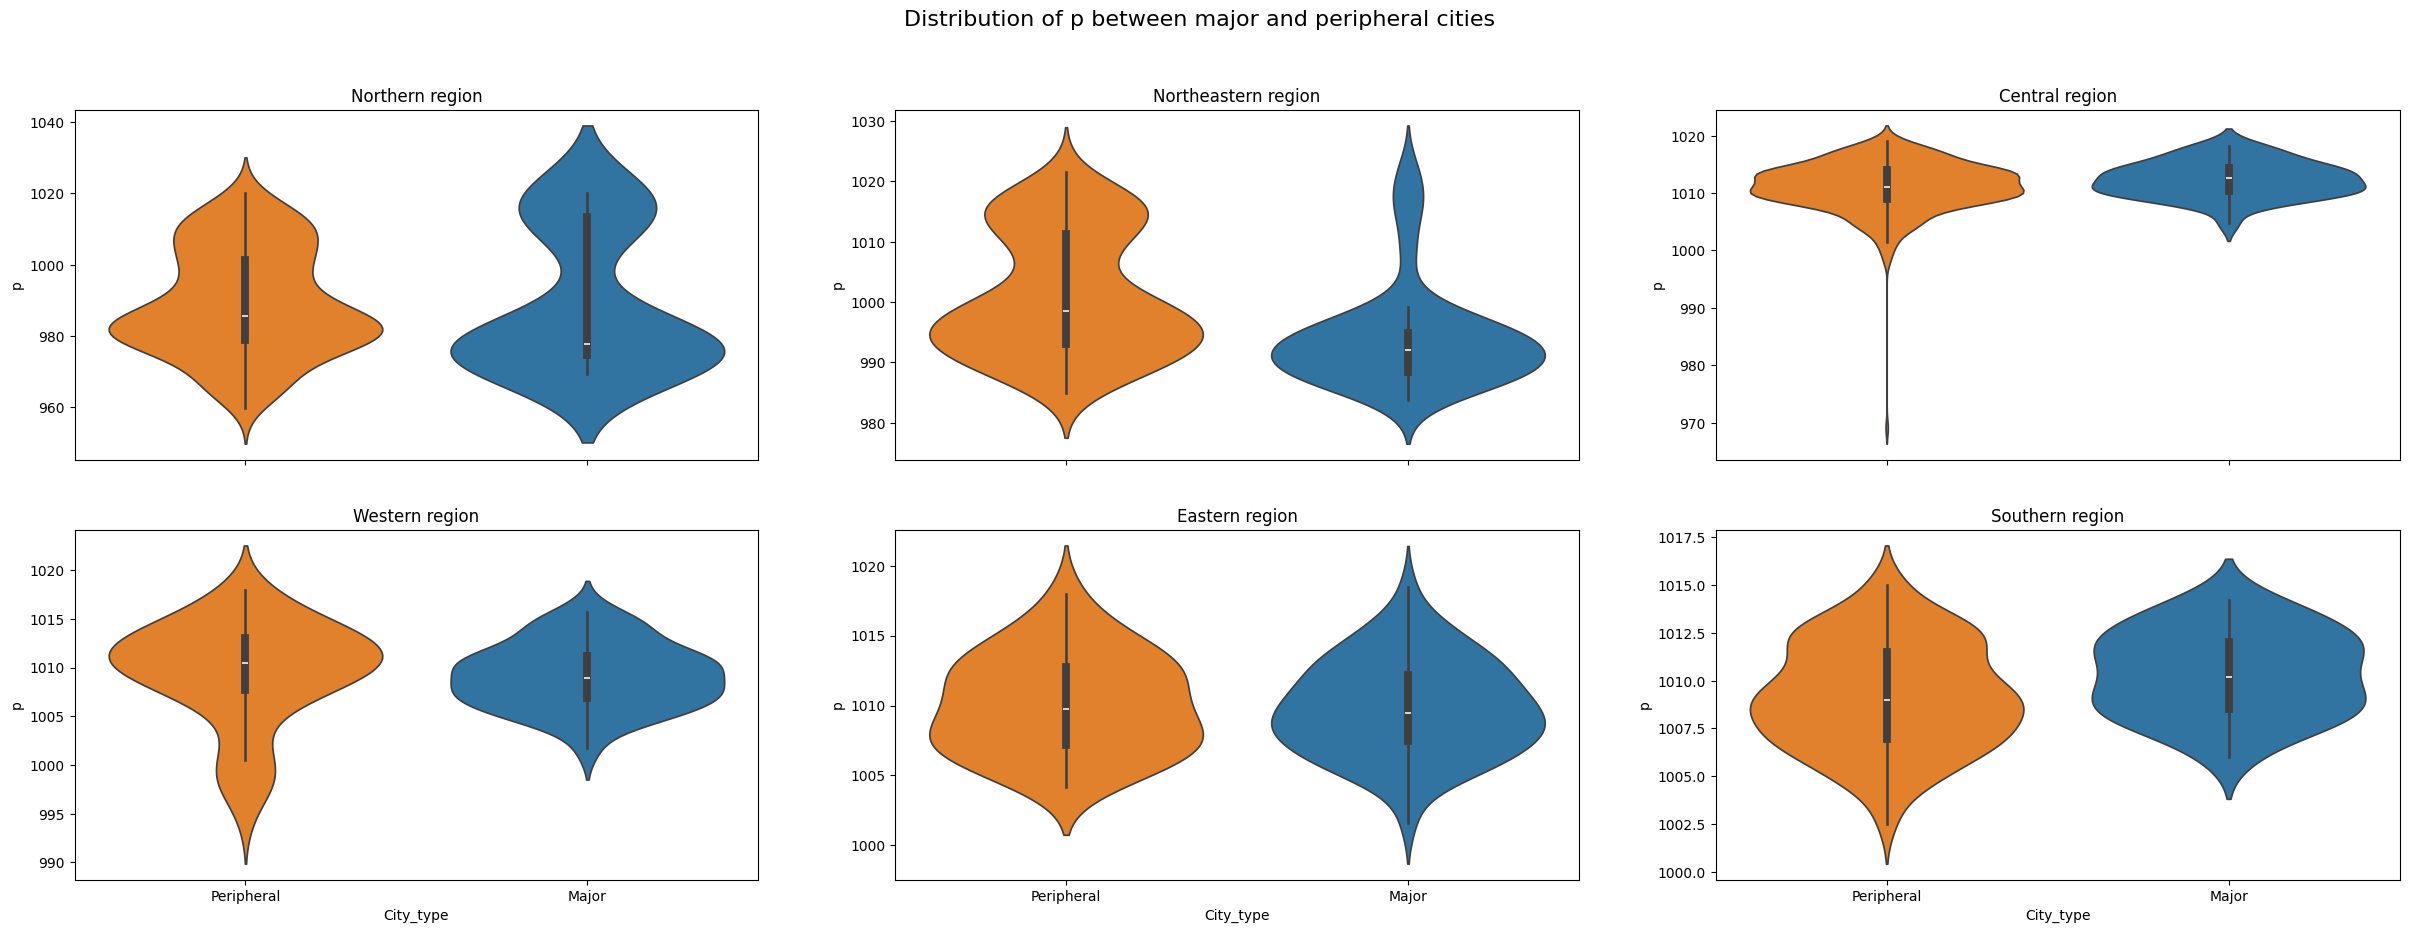

In [30]:
aqi_distribution(df, aqi_metric='p')

### Correlation among AQI metrics

In [31]:
major_df = df[df['City'].isin(df[df['City_type'] == 'Major']['City'].unique())]
major_df

,Timestamp,City,name,lat,lon,co,dew,h,no2,o3,p,pm10,pm25,r,so2,t,w,time,City_type,City_region
1,2025-02-19 18:11:33,Nakhon Ratchasima,"Municipal Waste Water Pumping Station, Nakhon ...",14.979537,102.098335,NaN,-4.6,9.2,11.0,23.7,985.9,NaN,100.0,0.2,0.6,31.9,0.5,2025-02-20 00:00:00,Major,Northeast
4,2025-02-19 18:11:35,Mueang Khon Kaen,"Khonkaen, Thailand (ส่วนอุทกวิทยา สำนักงานทรัพ...",16.445383,102.835250,NaN,-5.2,9.0,NaN,NaN,988.0,NaN,79.0,0.6,NaN,31.5,0.5,2025-02-20 00:00:00,Major,Northeast
6,2025-02-19 18:11:36,Kanchanaburi,"Pak Prak, Kanchanaburi, Kanchanaburi, Thailand...",14.022376,99.536195,0.1,-5.1,8.1,NaN,6.7,1005.0,47.0,117.0,NaN,NaN,33.5,2.0,2025-02-20 00:00:00,Major,West
15,2025-02-19 18:11:42,Bangkok,Bangkok,13.756331,100.501765,0.1,NaN,8.2,2.9,13.1,1008.9,56.0,120.0,2.0,0.6,31.7,2.0,2025-02-20 00:00:00,Major,Central
21,2025-02-19 18:11:45,Chiang Mai,Chiang Mai,18.787747,98.993128,NaN,NaN,8.7,7.5,14.6,970.7,82.0,98.0,NaN,0.6,34.7,1.0,2025-02-20 00:00:00,Major,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,2025-03-25 13:00:13,Bangkok,Bangkok,13.756331,100.501765,0.1,NaN,8.2,4.1,30.8,1007.7,67.0,148.0,NaN,0.6,35.0,2.0,2025-03-25 19:00:00,Major,Central
1270,2025-03-25 13:00:15,Chiang Mai,Chiang Mai,18.787747,98.993128,NaN,NaN,9.5,7.5,14.6,972.3,82.0,117.0,NaN,0.6,32.3,0.5,2025-03-25 19:00:00,Major,North
1274,2025-03-25 13:00:17,Rayong,Rayong,12.707434,101.147352,0.1,NaN,8.0,11.0,16.6,1004.7,49.0,114.0,NaN,2.2,31.7,1.0,2025-03-25 19:00:00,Major,East
1276,2025-03-25 13:00:18,Chonburi,"General Education Office, Chonburi, Thailand (...",13.354617,100.979217,NaN,-4.6,8.2,9.3,6.0,1006.0,33.0,96.0,NaN,1.1,34.0,1.0,2025-03-25 19:00:00,Major,East


In [32]:
peripheral_df = df[df['City'].isin(df[df['City_type'] == 'Peripheral']['City'].unique())]
peripheral_df

,Timestamp,City,name,lat,lon,co,dew,h,no2,o3,p,pm10,pm25,r,so2,t,w,time,City_type,City_region
0,2025-02-19 18:11:33,Samut Prakan,"City Hall, Samut Prakan, Thailand (ศาลากลางจัง...",13.599149,100.597345,0.1,-5.9,8.4,9.3,13.4,1008.5,55.0,110.0,0.6,0.6,31.7,0.5,2025-02-20 00:00:00,Peripheral,Central
2,2025-02-19 18:11:34,Surin,"Pyramid House, Surin, Thailand",14.793612,103.430560,NaN,-4.6,9.2,NaN,NaN,993.9,NaN,NaN,NaN,NaN,32.0,0.5,NaT,Peripheral,Northeast
3,2025-02-19 18:11:34,Sakon Nakhon,"Meteorological stations, Sakon Nakhon, Thailan...",17.156620,104.133216,0.1,-4.9,9.9,NaN,20.1,991.0,43.0,63.0,NaN,1.1,30.2,1.5,2025-02-20 00:00:00,Peripheral,Northeast
5,2025-02-19 18:11:35,Nong Khai,"T.Meechai A.Muang Nongkhai Province, Thailand ...",17.877480,102.728925,0.1,-4.1,10.4,1.8,13.8,988.2,36.0,75.0,NaN,0.6,30.5,1.5,2025-02-20 00:00:00,Peripheral,Northeast
7,2025-02-19 18:11:36,Suphan Buri,"Suphan Buri Provincial Central Stadium, Thaila...",14.476214,100.086095,0.1,-5.6,8.6,4.1,5.2,1008.3,30.0,52.0,NaN,0.6,31.8,2.5,2025-02-20 00:00:00,Peripheral,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,2025-03-25 13:00:20,Trang,"Polytechnic College, Trang, Thailand (วิทยาลัย...",7.570238,99.588743,0.1,23.1,64.0,1.2,NaN,1006.7,54.0,81.0,99.0,0.6,32.7,1.0,2025-03-25 19:00:00,Peripheral,South
1282,2025-03-25 13:00:20,Satun,"Phiman, Satun, Satun, Thailand (ต.พิมาน อ.เมือ...",6.624747,100.066159,0.1,-6.2,7.5,1.8,6.4,1006.1,21.0,71.0,1.5,0.6,33.4,1.5,2025-03-25 19:00:00,Peripheral,South
1283,2025-03-25 13:00:21,Narathiwat,"City Hall, Narathiwat, Thailand (ศาลากลางจังหว...",6.426853,101.823388,NaN,-5.8,7.8,NaN,NaN,1006.4,NaN,72.0,0.1,NaN,33.2,3.0,2025-03-25 19:00:00,Peripheral,South
1284,2025-03-25 13:00:21,Prachuap Khiri Khan,"Prachuap Khiri Khan - Gaia Station 10, Thailand",11.800270,99.790596,NaN,-4.8,8.3,NaN,NaN,996.7,57.0,133.0,NaN,NaN,33.5,6.1,2025-03-25 19:00:00,Peripheral,West


In [33]:
# a function to plot heatmap of AQI metrics
def plot_heatmap_city_type(df, plot_title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[['dew', 'h', 'no2', 'o3', 'p', 'pm10', 'pm25', 'r', 'so2', 't', 'w']].corr(), cmap='RdBu_r', annot=True)
    plt.title(plot_title)
    plt.show(); plt.close('all');

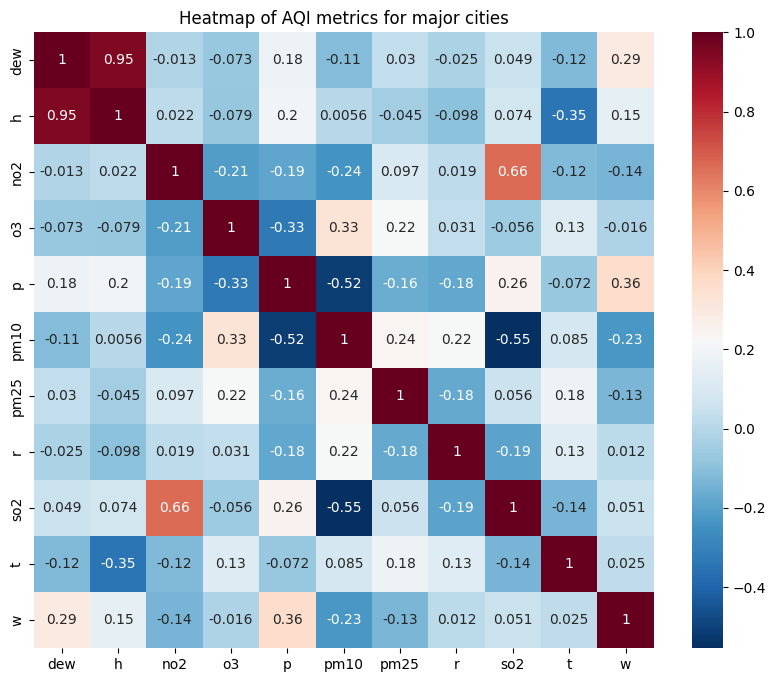

In [34]:
plot_heatmap_city_type(major_df, plot_title='Heatmap of AQI metrics for major cities')

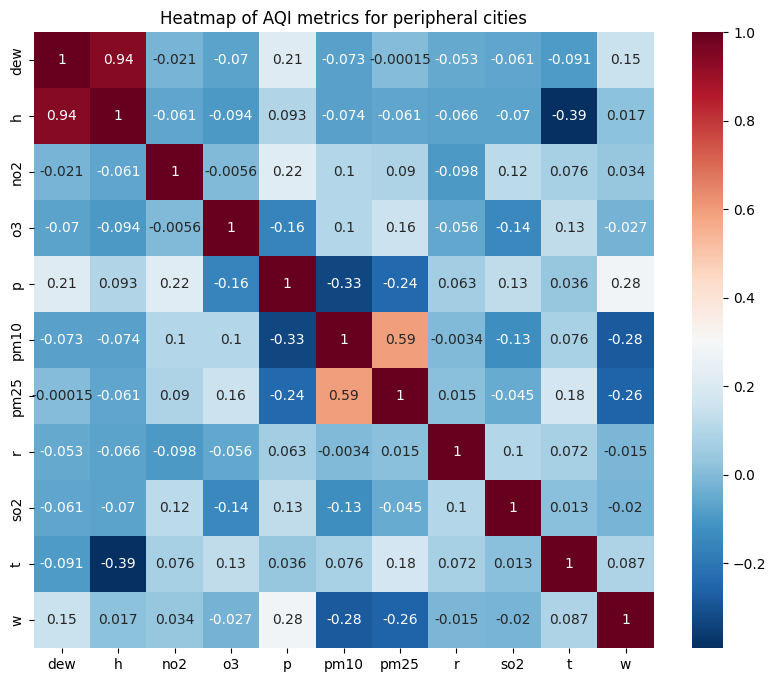

In [35]:
plot_heatmap_city_type(peripheral_df, plot_title='Heatmap of AQI metrics for peripheral cities')